In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

Using TensorFlow backend.


In [2]:
np.random.seed(0)

In [3]:
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

In [4]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [5]:
assert(X_train.shape[0]==Y_train.shape[0]),'The number of images is not equal to the number of labels'
assert(X_test.shape[0]==Y_test.shape[0]),'The number of images is not equal to the number of labels'
assert(X_train.shape[1:]==(28,28)),'The dimensions of the images are not 28x28'
assert(X_test.shape[1:]==(28,28)),'The dimensions of the images are not 28x28'

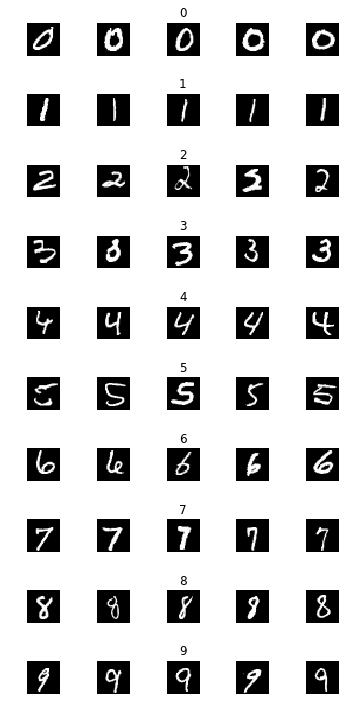

In [6]:
num_of_samples = []
cols = 5
num_classes = 10

fig, axs = plt.subplots(nrows=num_classes,ncols = cols, figsize = (5,10))
fig.tight_layout()

for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[Y_train==j]
        axs[j][i].imshow(x_selected[random.randint(0,len(x_selected)-1),:,:],cmap=plt.get_cmap('gray'))
        axs[j][i].axis('off')
        if i==2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

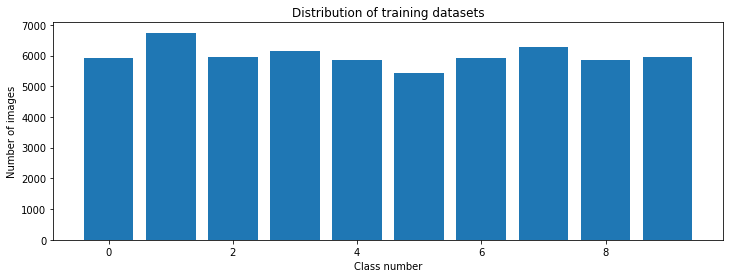

In [7]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0,num_classes),num_of_samples)
plt.title('Distribution of training datasets')
plt.xlabel('Class number')
plt.ylabel('Number of images')

In [8]:
y_train = to_categorical(Y_train,10)
y_test = to_categorical(Y_test,10)

In [9]:
X_train,X_test = X_train/255,X_test/255

In [10]:
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0],num_pixels)
print(X_train.shape)

(60000, 784)


In [11]:
X_test = X_test.reshape(X_test.shape[0],num_pixels)
print(X_test.shape)

(10000, 784)


In [12]:
def create_model():
    model= Sequential()
    model.add(Dense(10, input_dim = num_pixels,activation = 'relu'))
    model.add(Dense(20,activation='relu'))
 #   model.add(Dense(10,activation='relu'))
    model.add(Dense(10,activation='relu'))
    model.add(Dense(num_classes,activation='softmax'))
    
    model.compile(Adam(lr=0.01),loss = 'categorical_crossentropy',metrics=['accuracy'])
    
    return model

In [13]:
model = create_model()
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
Total params: 8,390
Trainable params: 8,390
Non-trainable params: 0
_________________________________________________________________
None


In [14]:
history = model.fit(X_train,y_train, validation_split=0.1,epochs=10, batch_size = 200, verbose =1,shuffle='true')

Instructions for updating:
Use tf.cast instead.
Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 2s 34us/step - loss: 0.5191 - acc: 0.8436 - val_loss: 0.2213 - val_acc: 0.9360
Epoch 2/10
54000/54000 [==============================] - 1s 24us/step - loss: 0.2652 - acc: 0.9226 - val_loss: 0.2106 - val_acc: 0.9390
Epoch 3/10
54000/54000 [==============================] - 1s 25us/step - loss: 0.2319 - acc: 0.9326 - val_loss: 0.1999 - val_acc: 0.9410
Epoch 4/10
54000/54000 [==============================] - 1s 21us/step - loss: 0.2228 - acc: 0.9363 - val_loss: 0.1991 - val_acc: 0.9430
Epoch 5/10
54000/54000 [==============================] - 1s 22us/step - loss: 0.2149 - acc: 0.9372 - val_loss: 0.1800 - val_acc: 0.9465
Epoch 6/10
54000/54000 [==============================] - 1s 22us/step - loss: 0.1969 - acc: 0.9425 - val_loss: 0.1762 - val_acc: 0.9482
Epoch 7/10
54000/54000 [==============================] - 1s 25us/step - loss: 0.

Text(0.5, 0, 'epoch')

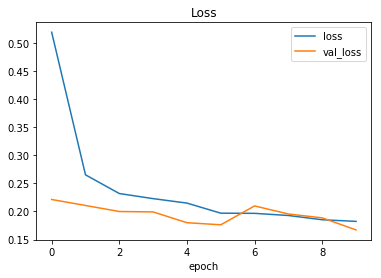

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

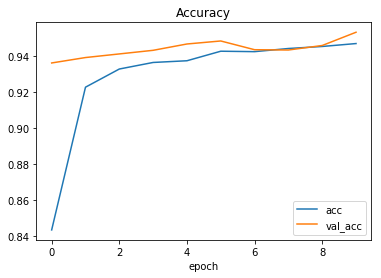

In [16]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc','val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [17]:
score = model.evaluate(X_test,y_test, verbose = 0)
print(type(score))

print('Test score : ',score[0])
print('Test accuracy : ',score[1])

<class 'list'>
Test score :  0.19932134591303766
Test accuracy :  0.9461


<Response [200]>


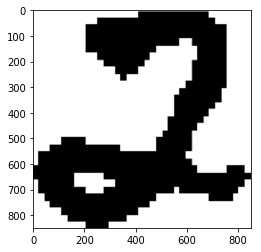

In [18]:
import requests
from PIL import Image
url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response  = requests.get(url, stream = True)
print(response)
img = Image.open(response.raw)

plt.imshow(img)

In [19]:
img_array = np.asarray(img)
print(img_array.shape)

(850, 850, 4)


In [20]:
import cv2
resized = cv2.resize(img_array,(28,28))
gray_scale = cv2.cvtColor(resized,cv2.COLOR_BGR2GRAY)

print(gray_scale.shape)

(28, 28)


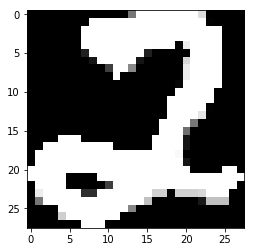

In [21]:
image = cv2.bitwise_not(gray_scale)
plt.imshow(image, cmap = plt.get_cmap('gray') )

In [22]:
image = image/255
image = image.reshape(1,784)


In [23]:
prediction = model.predict_classes(image)
print('Predicted digit : ',str(prediction))

Predicted digit :  [2]
